The percentage change in the total energy of the system after 100 orbits is -0.00013449419826680624%
The percentage change in the Sun-Earth Separation after 100 orbits is -0.48850077139041514%
The average time period for Earth after 100 orbits as a percentage of Earth's orbit is -0.050298332349529795%


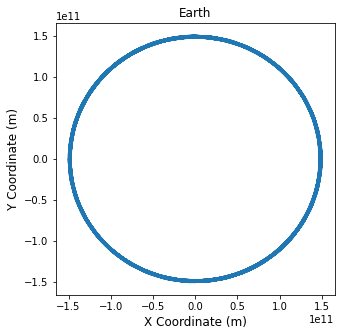

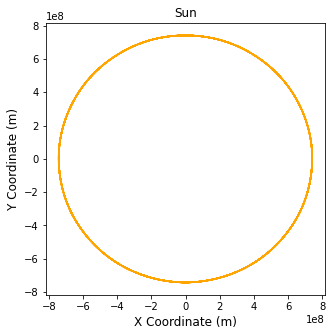

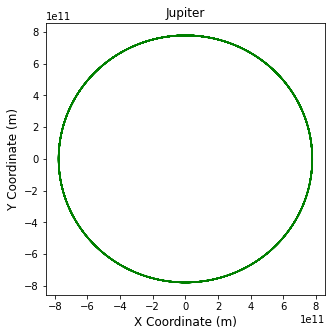

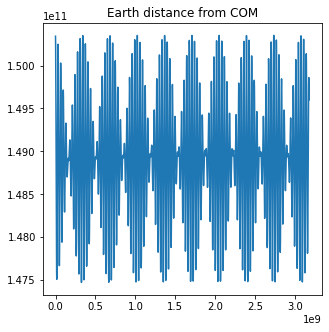

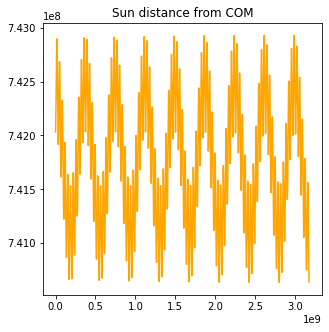

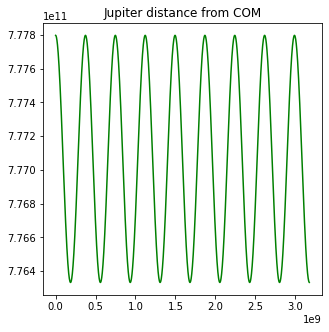

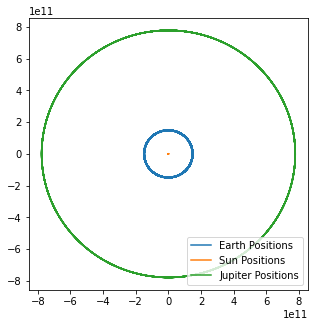

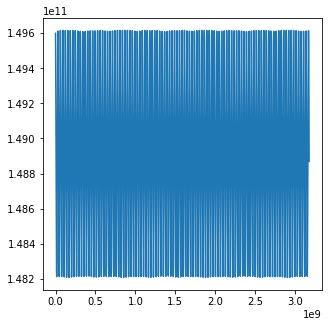

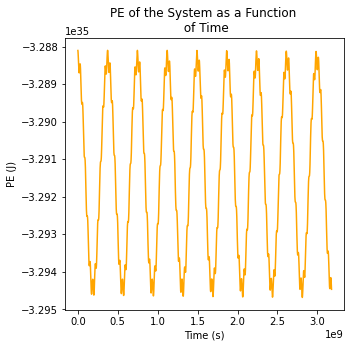

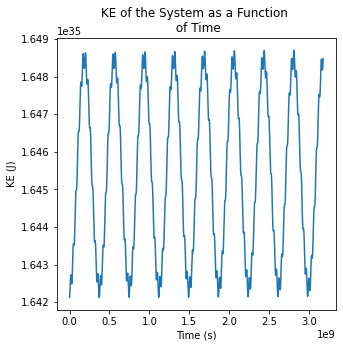

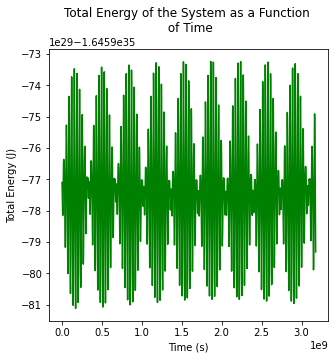

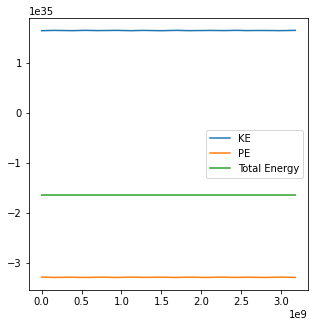

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#from Initial_Conditions import r0_earth
#from Initial_Conditions import r0_sun

# constants
G = 6.67 * 10 ** (-11) # m^3 kg^-1 s^-2
s = 0   # softening factor for force

# masses (kg)
earth_mass = 5.9742 * 10 ** 24
sun_mass = 1.9889 * 10 ** 30
jupiter_mass = 1.8986 * 10 ** 27

# distances (m)
d_earth_sun = 1.4960 * 10 ** 11
d_jupiter_sun = 7.7854 * 10 ** 11
d_earth_jupiter = d_earth_sun + d_jupiter_sun

#letting sun start as (0,0)
xy_sun = np.array([0,0])
xy_jupiter = np.array([d_jupiter_sun,0])
xy_earth = np.array([- d_earth_sun,0])
xy_cm = (xy_sun * sun_mass + xy_jupiter * jupiter_mass + xy_earth * earth_mass) / (sun_mass + jupiter_mass + earth_mass)

r0_sun = xy_sun - xy_cm
r0_jupiter = xy_jupiter - xy_cm
r0_earth = xy_earth - xy_cm

d_jupiter_cm = abs(r0_jupiter[0])
d_sun_cm = abs(r0_sun[0])
d_earth_cm = abs(r0_earth[0])

# orbits
n_orbits = 100

# orbital period (s)
# assuming circular orbit
# T = sqrt((4 * pi^2 * r^3)/(G * m))
# distance not to the com of all three as only the other two bodies matter in this case
t_earth = np.sqrt((4 * (np.pi) ** 2 * ((d_earth_sun * sun_mass + d_earth_jupiter * jupiter_mass)/(jupiter_mass + sun_mass)) ** 3)/(G * (jupiter_mass + sun_mass)))
t_earth_full = n_orbits * t_earth  # as running for 100 orbits
#t_sun = np.sqrt((4 * (np.pi) ** 2 * ((- d_earth_sun * earth_mass + d_jupiter_sun * jupiter_mass)/(jupiter_mass + earth_mass)) ** 3)/(G * (jupiter_mass + earth_mass)))
t_jupiter = np.sqrt((4 * (np.pi) ** 2 * (d_jupiter_sun) ** 3)/(G * (sun_mass)))
t_sun = t_jupiter

#print(t_jupiter)
#print(t_earth)
#print(t_sun)

# number of timesteps

dt = 10*24*3600
n_timesteps = int(t_earth_full/dt)  # one per ten days

v0_earth = 2 * np.pi * d_earth_cm / t_earth
v0_sun = 2 * np.pi * d_sun_cm / t_sun
v0_jupiter = 2 * np.pi * d_jupiter_cm / t_jupiter

# calc initial v components
theta_half_dt = ((1/2) * dt / t_earth) * 2 * np.pi
alpha_half_dt = ((1/2) * dt / t_sun) * 2 * np.pi
beta_half_dt = ((1/2) * dt / t_jupiter) * 2 * np.pi

vx0_earth = - v0_earth * np.sin(theta_half_dt)
vy0_earth = - v0_earth * np.cos(theta_half_dt)

vx0_sun = - v0_sun * np.sin(alpha_half_dt) 
vy0_sun = - v0_sun * np.cos(alpha_half_dt)

vx0_jupiter = v0_jupiter * np.sin(beta_half_dt)
vy0_jupiter = v0_jupiter * np.cos(beta_half_dt)

v0_earth_vector = [vx0_earth, vy0_earth]
v0_sun_vector = [vx0_sun, vy0_sun]
v0_jupiter_vector = [vx0_jupiter, vy0_jupiter]

# set up empty arrays for positions and velocities
earth_positions = np.empty((n_timesteps, 2))
sun_positions = np.empty((n_timesteps, 2))
jupiter_positions = np.empty((n_timesteps, 2))
cm_positions = np.empty((n_timesteps, 2))

v_earth = np.empty((n_timesteps + 1, 2))
v_sun = np.empty((n_timesteps + 1, 2))
v_jupiter = np.empty((n_timesteps + 1, 2))

# put initial positions and velocities in the arrays
earth_positions[0] = r0_earth
sun_positions[0] = r0_sun
jupiter_positions[0] = r0_jupiter
cm_positions[0] = np.array([0,0])

v_earth[0] = v0_earth_vector
v_sun[0] = v0_sun_vector
v_jupiter[0] = v0_jupiter_vector

# force on m1 due to m0

def grav_force(m1,m0,r1,r0):
    modulus = np.sqrt(sum((r1 - r0) ** 2))
    force = - G * m1 * m0 * ((r1 - r0)/(((modulus) ** 2 + s ** 2) ** (3/2)))
    return force

f0_earth = grav_force(earth_mass, sun_mass, earth_positions[0], sun_positions[0]) + grav_force(earth_mass, jupiter_mass, earth_positions[0], jupiter_positions[0])
f0_jupiter = grav_force(jupiter_mass, sun_mass, jupiter_positions[0], sun_positions[0]) + grav_force(jupiter_mass, earth_mass, jupiter_positions[0], earth_positions[0])
f0_sun = grav_force(sun_mass, jupiter_mass, sun_positions[0], jupiter_positions[0]) + grav_force(sun_mass, earth_mass, sun_positions[0], earth_positions[0])

f_earth = np.empty((n_timesteps, 2))
f_sun = np.empty((n_timesteps, 2))
f_jupiter = np.empty((n_timesteps, 2))

f_earth[0] = f0_earth
f_sun[0] = f0_sun
f_jupiter[0] = f0_jupiter

for i in range(0, n_timesteps - 1):
    
    v_earth[i+1] = v_earth[i] + f_earth[i] * dt / earth_mass
    v_sun[i+1] = v_sun[i] + f_sun[i] * dt / sun_mass
    v_jupiter[i+1] = v_jupiter[i] + f_jupiter[i] * dt / jupiter_mass
    
    earth_positions[i+1] = earth_positions[i] + v_earth[i+1] * dt
    sun_positions[i+1] = sun_positions[i] + v_sun[i+1] * dt
    jupiter_positions[i+1] = jupiter_positions[i] + v_jupiter[i+1] * dt
    
    # reset to reference frame of com
    cm_positions[i+1] = (sun_positions[i+1] * sun_mass + jupiter_positions[i+1] * jupiter_mass + earth_positions[i+1] * earth_mass) / (sun_mass + jupiter_mass + earth_mass)
    earth_positions[i+1] = earth_positions[i+1] - cm_positions[i+1]
    sun_positions[i+1] = sun_positions[i+1] - cm_positions[i+1]
    jupiter_positions[i+1] = jupiter_positions[i+1] - cm_positions[i+1]

    f_earth[i+1] = grav_force(earth_mass, sun_mass, earth_positions[i+1], sun_positions[i+1]) + grav_force(earth_mass, jupiter_mass, earth_positions[i+1], jupiter_positions[i+1])
    f_jupiter[i+1] = grav_force(jupiter_mass, sun_mass, jupiter_positions[i+1], sun_positions[i+1]) + grav_force(jupiter_mass, earth_mass, jupiter_positions[i+1], earth_positions[i+1])
    f_sun[i+1] = grav_force(sun_mass, jupiter_mass, sun_positions[i+1], jupiter_positions[i+1]) + grav_force(sun_mass, earth_mass, sun_positions[i+1], earth_positions[i+1])

'''
need to calculate one extra v for the half timestep after the last position
this will allow me to shift the kinetic energies to the same time as the position
and so I will have the same number of velocities and positoins and so the same
number of ke and pe points
'''

v_earth[n_timesteps] = v_earth[n_timesteps - 1] + f_earth[n_timesteps - 1] * dt / earth_mass
v_sun[n_timesteps] = v_sun[n_timesteps - 1] + f_sun[n_timesteps - 1] * dt / sun_mass
v_jupiter[n_timesteps] = v_jupiter[n_timesteps - 1] + f_jupiter[n_timesteps - 1] * dt / jupiter_mass    

def calc_pe(mi,mj,ri,rj):
    modulus = np.sqrt(sum((ri - rj) ** 2))
    pe = - G * mi * mj / modulus
    return pe

# need to shift the v so that its at the same time as position
def calc_ke(m, v):
    v_mod = np.sqrt(sum(v ** 2))
    ke = 1/2 * m * v_mod ** 2
    return ke

pe_earth_jupiter = np.empty(n_timesteps)
pe_earth_sun = np.empty(n_timesteps)
pe_sun_jupiter = np.empty(n_timesteps)
pe_sun_earth = np.empty(n_timesteps)
pe_jupiter_earth = np.empty(n_timesteps)
pe_jupiter_sun = np.empty(n_timesteps)

ke_earth = np.empty(n_timesteps)
ke_sun = np.empty(n_timesteps)
ke_jupiter = np.empty(n_timesteps)

v_earth_shifted = np.empty((n_timesteps, 2))
v_sun_shifted = np.empty((n_timesteps, 2))
v_jupiter_shifted = np.empty((n_timesteps, 2))

for i in range(0, n_timesteps):
    v_earth_shifted[i] = (v_earth[i] + v_earth[i+1]) / 2
    v_sun_shifted[i] = (v_sun[i] + v_sun[i+1]) / 2
    v_jupiter_shifted[i] = (v_jupiter[i] + v_jupiter[i+1]) / 2

#print(v_earth_shifted)
#print(v_sun_shifted)
#print(v_jupiter_shifted)

for i in range(0, n_timesteps):
    pe_earth_sun[i] = calc_pe(earth_mass, sun_mass, earth_positions[i], sun_positions[i])
    pe_earth_jupiter[i] = calc_pe(earth_mass, jupiter_mass, earth_positions[i], jupiter_positions[i])
    pe_sun_earth[i] = calc_pe(sun_mass, earth_mass, sun_positions[i], earth_positions[i])
    pe_sun_jupiter[i] = calc_pe(sun_mass, jupiter_mass, sun_positions[i], jupiter_positions[i])
    pe_jupiter_earth[i] = calc_pe(jupiter_mass, earth_mass, jupiter_positions[i], earth_positions[i])
    pe_jupiter_earth[i] = calc_pe(jupiter_mass, sun_mass, jupiter_positions[i], sun_positions[i])

    ke_earth[i] = calc_ke(earth_mass, v_earth_shifted[i])
    ke_sun[i] = calc_ke(sun_mass, v_sun_shifted[i])
    ke_jupiter[i] = calc_ke(jupiter_mass, v_jupiter_shifted[i])

pe_earth = pe_earth_sun + pe_earth_jupiter
pe_sun = pe_sun_earth + pe_sun_jupiter
pe_jupiter = pe_jupiter_sun + pe_jupiter_earth

system_pe = pe_earth_sun + pe_sun_jupiter
system_ke = ke_earth + ke_sun + ke_jupiter
total_system_e = system_pe + system_ke

#print(cm_positions)
#print(v_earth)
#print(earth_positions)
#print(v_sun)
#print(sun_positions)  

r_earth = np.sqrt(earth_positions[:,0] ** 2 + earth_positions[:,1] ** 2)
r_sun = np.sqrt(sun_positions[:,0] ** 2 + sun_positions[:,1] ** 2)
r_jupiter = np.sqrt(jupiter_positions[:,0] ** 2 + jupiter_positions[:,1] ** 2)
s_e_separation = np.sqrt((earth_positions[:,0] - sun_positions[:,0]) ** 2 + (earth_positions[:,1]  - sun_positions[:,1]) ** 2)

times = np.empty(n_timesteps)
times[0] = 0
for i in range(0, n_timesteps - 1):
    times[i + 1] = times[i] + dt

av_orbit_time = times[-1]/100
av_orbit_percent_diff = (av_orbit_time - t_earth) / abs(t_earth) * 100
e_change_percent = (total_system_e[-1] - total_system_e[0]) / abs(total_system_e[0]) * 100
s_e_sep_change_percent = (s_e_separation[-1] - s_e_separation[0]) / abs(s_e_separation[0]) * 100

print(f"The percentage change in the total energy of the system after 100 orbits is {e_change_percent}%")
print(f"The percentage change in the Sun-Earth Separation after 100 orbits is {s_e_sep_change_percent}%")
print(f"The average time period for Earth after 100 orbits as a percentage of Earth's orbit is {av_orbit_percent_diff}%")


plt.figure(figsize = (5,5))
plt.figure(1)
plt.plot(earth_positions[:,0],earth_positions[:,1])
plt.title("Earth", fontsize = 12)
plt.xlabel("X Coordinate (m)", fontsize = 12)
plt.ylabel("Y Coordinate (m)",fontsize = 12)

plt.figure(figsize = (5,5))
plt.figure(2)
plt.plot(sun_positions[:,0],sun_positions[:,1], color = 'orange')
plt.title("Sun", fontsize = 12)
plt.xlabel("X Coordinate (m)", fontsize = 12)
plt.ylabel("Y Coordinate (m)",fontsize = 12)

plt.figure(figsize = (5,5))
plt.figure(3)
plt.plot(jupiter_positions[:,0],jupiter_positions[:,1], color = 'green')
plt.title("Jupiter", fontsize = 12)
plt.xlabel("X Coordinate (m)", fontsize = 12)
plt.ylabel("Y Coordinate (m)",fontsize = 12)

plt.figure(figsize = (5,5))
plt.figure(4)
plt.plot(times, r_earth)
plt.title("Earth distance from COM")

plt.figure(figsize = (5,5))
plt.figure(5)
plt.plot(times, r_sun, color = 'orange')
plt.title("Sun distance from COM")

plt.figure(figsize = (5,5))
plt.figure(6)
plt.plot(times, r_jupiter, color = 'green')
plt.title("Jupiter distance from COM")


plt.figure(figsize = (5,5))
plt.figure(7)
plt.plot(earth_positions[:,0],earth_positions[:,1], label = "Earth Positions")
plt.plot(sun_positions[:,0],sun_positions[:,1], label = "Sun Positions")
plt.plot(jupiter_positions[:,0],jupiter_positions[:,1], label = "Jupiter Positions")
#plt.xlabel("X Coordinate (m)", fontsize = 14, fontname="Times New Roman", fontweight = 'bold')
#plt.ylabel("Y Coordinate (m)",fontsize = 14, fontname="Times New Roman", fontweight = 'bold')
#plt.title("Orbital Paths of Earth, the Sun and Jupiter \nfor 100 Earth Orbits", fontsize = 14, fontname="Times New Roman", fontweight = 'bold')
plt.legend()

plt.figure(figsize = (5,5))
plt.figure(8)
plt.plot(times, s_e_separation)
#plt.title("Sun-Earth Separation as a Function \n of Time", fontsize = 14, fontname="Times New Roman", fontweight = 'bold')
#plt.xlabel("Time (s)", fontsize = 14, fontname="Times New Roman", fontweight = 'bold')
#plt.ylabel("Separation (m)", fontsize = 14, fontname="Times New Roman", fontweight = 'bold')

plt.figure(figsize = (5,5))
plt.figure(9)
plt.plot(times, system_pe, color = 'orange')
plt.title("PE of the System as a Function \n of Time")
plt.xlabel("Time (s)")
plt.ylabel("PE (J)")

plt.figure(figsize = (5,5))
plt.figure(10)
plt.plot(times, system_ke)
plt.title("KE of the System as a Function \n of Time")
plt.xlabel("Time (s)")
plt.ylabel("KE (J)")

plt.figure(figsize = (5,5))
plt.figure(11)
plt.plot(times, total_system_e, color = 'green')
plt.title("Total Energy of the System as a Function \n of Time")
plt.xlabel("Time (s)")
plt.ylabel("Total Energy (J)")

plt.figure(figsize = (5,5))
plt.figure(12)
plt.plot(times, system_ke, label = "KE")
plt.plot(times, system_pe, label = "PE")
plt.plot(times, total_system_e, label = "Total Energy")
#plt.xlabel("Time (s)", fontsize = 14, fontname="Times New Roman", fontweight = 'bold')
#plt.ylabel("Energy (J)",fontsize = 14, fontname="Times New Roman", fontweight = 'bold')
#plt.title("The KE, PE and Total Energy of the System \nas a Function of Time", fontsize = 14, fontname="Times New Roman", fontweight = 'bold')

plt.legend()

plt.show()
